In [182]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

boston = load_boston()

In [86]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [87]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [88]:
df['Med_Val'] = boston['target']

In [89]:
df.shape

(506, 14)

In [90]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Med_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [91]:
#drop target, keep as np array
X = df.drop('Med_Val', axis=1).values

In [92]:
#keep only the target as np array
y = df['Med_Val'].values

In [93]:
#slice our rooms column
X_rooms = X[:,5]

In [94]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [95]:
X_rooms.shape

(506,)

In [96]:
X_rooms

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [97]:
X_rooms = X_rooms.reshape(-1,1)

In [98]:
X_rooms.shape

(506, 1)

In [99]:
y = y.reshape(-1,1)

In [100]:
y.shape

(506, 1)

Text(0.5,0,'Number of rooms')

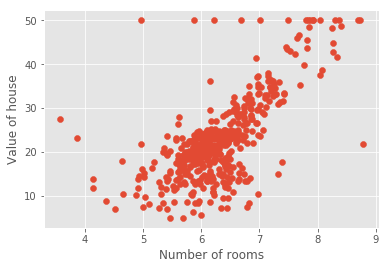

In [101]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house')
plt.xlabel('Number of rooms')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [114]:
#ordinary least squares
reg = linear_model.LinearRegression()

In [115]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
y_pred = reg.predict(X_test)

In [117]:
reg.score(X_test, y_test)

0.7109203586326271

In [119]:
#only works with one x value. ie X_rooms
#prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1, 1)

In [120]:
#only works with one x value. ie X_rooms
#plt.scatter(X_train, y_train, color='blue')
#plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)

Cross Validation

In [121]:
#split data into folds, 5 folds is a good rule of thumb. More folds is more computationally expensive

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
reg = linear_model.LinearRegression()

In [124]:
cv_result = cross_val_score(reg, X, y, cv=5)

In [128]:
#score reported is R^2. Each result is from a fold
print(cv_result)

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]


In [129]:
np.mean(cv_result)

0.35074135093251313

Ridge Regression

In [131]:
ridge = Ridge(alpha=.1, normalize=True)

In [132]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge_pred = ridge.predict(X_test)

In [135]:
ridge.score(X_test, y_test)

0.6995565027100417

Lasso

In [150]:
names = df.drop('Med_Val', axis=1).columns

In [151]:
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [152]:
lasso = Lasso(alpha=.1, normalize=True)

In [153]:
lasso_coef = lasso.fit(X, y).coef_

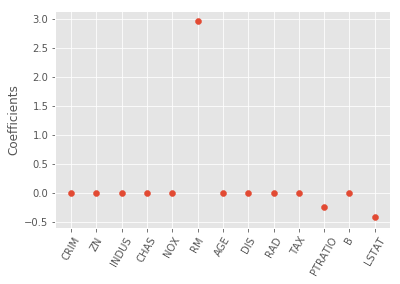

In [157]:
_ = plt.scatter(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')

In [138]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
lasso_pred = lasso.predict(X_test)

In [140]:
lasso.score(X_test, y_test)

0.5950229292587828

Hold Our and Grid Search

In [160]:
l1_space = np.linspace(0, 1, 30)

In [169]:
param_grid = {'alpha': l1_space}

In [170]:
ridge = Ridge()

In [173]:
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

In [175]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.     , 0.03448, 0.06897, 0.10345, 0.13793, 0.17241, 0.2069 ,
       0.24138, 0.27586, 0.31034, 0.34483, 0.37931, 0.41379, 0.44828,
       0.48276, 0.51724, 0.55172, 0.58621, 0.62069, 0.65517, 0.68966,
       0.72414, 0.75862, 0.7931 , 0.82759, 0.86207, 0.89655, 0.93103,
       0.96552, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [176]:
print("Tuned ElasticNet l1 ratio: {}".format(ridge_cv.best_params_))

Tuned ElasticNet l1 ratio: {'alpha': 0.0}


In [177]:
y_pred = ridge_cv.predict(X_test)

In [179]:
r2 = ridge_cv.score(X_test, y_test)

In [180]:
mse = mean_squared_error(y_test, y_pred)

In [181]:
print("Tuned R squared: {}".format(r2))
print("Tuned MSE: {}".format(mse))

Tuned R squared: 0.7109203586326276
Tuned MSE: 21.54021894393175


PreProcessing